# 🔁 Exploring the Impact of Ansatz Circuit Depth on HQNN Performance

This experiment investigates how varying the depth of the ansatz circuit (by increasing the number of `reps`) affects the HQNN's localization accuracy. The feature map is fixed to `ZZFeatureMap`, and performance is compared across three signal types in `scenario_one`.

In [2]:
# Setup and Imports
import sys
sys.path.append("..")

import torch
from torch import nn, optim
from hqnn_core.qnn_builder import create_qnn
from hqnn_core.classical_model import ClassicalNN
from hqnn_core.hqnn_model import HybridModel
from hqnn_core.train import train_model
from hqnn_core.evaluate import evaluate_model
from hqnn_core.data_utils import load_rssi_dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Parameters
feature_map_type = "zz"           # feature map is fixed
ansatz_type = "real"              # depth tested
depths_to_test = [1, 2, 3, 4, 5]  # reps values

num_qubits = 3
learning_rate = 0.01
num_epochs = 15
batch_size = 16
sc_num = 1

# Dataset targets
scenarios = ["scenario_one"]
signals = ["bluetooth", "wifi", "zigbee"]

In [ ]:
# Training
results = []

for reps in depths_to_test:
    for scenario in scenarios:
        for signal in signals:
            print(f"Training with reps={reps} on {scenario.upper()} + {signal}")

            train_loader, test_loader = load_rssi_dataset(
                scenario=scenario,
                signal=signal,
                sc_num=sc_num,
                batch_size=batch_size,
                base_path="../data"
            )

            qnn = create_qnn(
                num_qubits=num_qubits,
                reps=reps,
                feature_map_type=feature_map_type,
                ansatz_type=ansatz_type
            )

            clnn = ClassicalNN(input_size=3, hidden_size=32, output_size=2)
            model = HybridModel(qnn, clnn)

            criterion = nn.MSELoss()
            optimizer = optim.Adam(model.parameters(), lr=learning_rate)

            train_model(model, train_loader, criterion, optimizer, num_epochs=num_epochs, verbose=False)
            rmse = evaluate_model(model, test_loader)

            results.append({
                "Scenario": scenario,
                "Signal": signal,
                "Reps": reps,
                "RMSE": rmse
            })

▶ Training with reps=1 on SCENARIO_ONE + bluetooth
✅ RMSE on test set: 1.7746
▶ Training with reps=1 on SCENARIO_ONE + wifi
✅ RMSE on test set: 1.5377
▶ Training with reps=1 on SCENARIO_ONE + zigbee
✅ RMSE on test set: 1.8099
▶ Training with reps=2 on SCENARIO_ONE + bluetooth
✅ RMSE on test set: 1.3313
▶ Training with reps=2 on SCENARIO_ONE + wifi
✅ RMSE on test set: 1.6389
▶ Training with reps=2 on SCENARIO_ONE + zigbee
✅ RMSE on test set: 1.2339
▶ Training with reps=3 on SCENARIO_ONE + bluetooth
✅ RMSE on test set: 1.6929
▶ Training with reps=3 on SCENARIO_ONE + wifi
✅ RMSE on test set: 1.1950
▶ Training with reps=3 on SCENARIO_ONE + zigbee
✅ RMSE on test set: 1.7544
▶ Training with reps=4 on SCENARIO_ONE + bluetooth
✅ RMSE on test set: 1.9190
▶ Training with reps=4 on SCENARIO_ONE + wifi
✅ RMSE on test set: 1.7695
▶ Training with reps=4 on SCENARIO_ONE + zigbee
✅ RMSE on test set: 1.6972
▶ Training with reps=5 on SCENARIO_ONE + bluetooth
✅ RMSE on test set: 1.5037
▶ Training with re

In [1]:
# Results
df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by="RMSE", ascending=True).reset_index(drop=True)
df_results.to_csv("ansatz_depth_experiment_results.csv", index=False)

NameError: name 'pd' is not defined

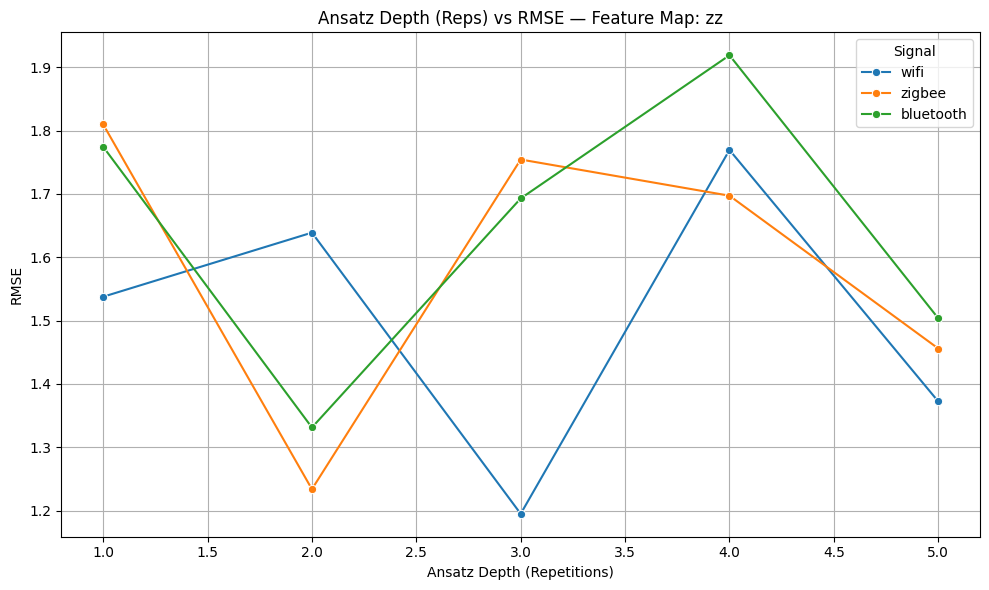

In [ ]:
# Visualization
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_results, x="Reps", y="RMSE", hue="Signal", marker="o")
plt.title(f"Ansatz Depth (Reps) vs RMSE — Feature Map: {feature_map_type}")
plt.xlabel("Ansatz Depth (Repetitions)")
plt.ylabel("RMSE")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.savefig("ansatz_depth_vs_rmse.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.show()